Stock Prediction using Linear Regression, LSTML and ARIMA model

In [1]:
%pip install tensorflow
%pip install keras
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install scikit-learn
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#for more advanced visualizations
%pip install plotly
%pip install bokeh
%pip install mplfinance


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

from tabulate import tabulate

import matplotlib.pyplot as plt
import plotly.express as px
import bokeh.plotting as bkp

In [5]:
# Load the data
df=pd.read_csv('AAPL.csv')
print(tabulate(df.head(), headers='keys', tablefmt='psql'))

+----+--------------+----------+---------------------------+---------+---------+--------+--------+----------+------------+-----------+----------+-----------+-------------+-----------+---------------+
|    |   Unnamed: 0 | symbol   | date                      |   close |    high |    low |   open |   volume |   adjClose |   adjHigh |   adjLow |   adjOpen |   adjVolume |   divCash |   splitFactor |
|----+--------------+----------+---------------------------+---------+---------+--------+--------+----------+------------+-----------+----------+-----------+-------------+-----------+---------------|
|  0 |            0 | AAPL     | 2015-05-27 00:00:00+00:00 | 132.045 | 132.26  | 130.05 | 130.34 | 45833246 |    121.683 |   121.881 |  119.844 |   120.111 |    45833246 |         0 |             1 |
|  1 |            1 | AAPL     | 2015-05-28 00:00:00+00:00 | 131.78  | 131.95  | 131.1  | 131.86 | 30733309 |    121.438 |   121.595 |  120.812 |   121.512 |    30733309 |         0 |             1 |


In [6]:
# extract data needed for stock prediction
df = df[['date', 'close']]
print(tabulate(df.head(), headers='keys', tablefmt='psql'))

+----+---------------------------+---------+
|    | date                      |   close |
|----+---------------------------+---------|
|  0 | 2015-05-27 00:00:00+00:00 | 132.045 |
|  1 | 2015-05-28 00:00:00+00:00 | 131.78  |
|  2 | 2015-05-29 00:00:00+00:00 | 130.28  |
|  3 | 2015-06-01 00:00:00+00:00 | 130.535 |
|  4 | 2015-06-02 00:00:00+00:00 | 129.96  |
+----+---------------------------+---------+


In [7]:
df.shape

(1258, 2)

In [8]:
df.dtypes

date      object
close    float64
dtype: object

In [9]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
print(tabulate(df[['date']].head(), headers='keys', tablefmt='psql'))

+----+---------------------------+
|    | date                      |
|----+---------------------------|
|  0 | 2015-05-27 00:00:00+00:00 |
|  1 | 2015-05-28 00:00:00+00:00 |
|  2 | 2015-05-29 00:00:00+00:00 |
|  3 | 2015-06-01 00:00:00+00:00 |
|  4 | 2015-06-02 00:00:00+00:00 |
+----+---------------------------+


C:\Users\HP\AppData\Local\Temp\ipykernel_17536\3579199414.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)


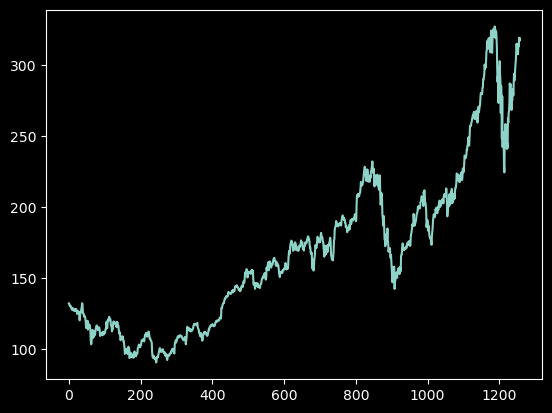

In [10]:
plt.style.use('dark_background')
plt.plot(df.index, df['close'])
plt.show()

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=df['date'], y=df['close'], mode='lines', name='Close Price'))

fig.update_layout(title='AAPL Stock Price Over Time',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  template='plotly_dark')

fig.show()

Create different copies to try different models

In [11]:
df_lr = df.copy()
df_lstm = df.copy()


In [12]:
# Convert the date index to a numerical format for regression
df_lr['date'] = np.arange(len(df_lr))  # Creates a sequential numeric index

# Features (X) are dates, labels (y) are close prices
X = df_lr[['date']]  # Dates as numeric values
y = df_lr['close']  # Close prices



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results with Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=X_test['date'], y=y_test, mode='markers', name='Actual', marker=dict(color='blue')))
fig.add_trace(go.Scatter(x=X_test['date'], y=y_pred, mode='markers', name='Predicted', marker=dict(color='red')))

fig.update_layout(title='Actual vs Predicted Close Prices',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  template='plotly_dark')

fig.show()

Mean Squared Error: 591.1117184836235
R^2 Score: 0.8157783097238355


Now will use LSTM to do prediction and forecast

In [14]:
#Extract close 
df_lstm
df1=df_lstm.reset_index()['close']

In [15]:
df1.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

In [16]:
#Scale the target variable for the model
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [18]:
# Splitting dataset into train and test split 
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]
training_size, test_size


(817, 441)

In [19]:

# convert an array of values into a dataset matrix
import numpy


def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0] 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)




In [20]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [21]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')



In [24]:

# Plot the loss and val_loss using Plotly
history = model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)

fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(1, 101)), y=history.history['loss'], mode='lines', name='Training Loss'))
fig.add_trace(go.Scatter(x=list(range(1, 101)), y=history.history['val_loss'], mode='lines', name='Validation Loss'))

fig.update_layout(title='Training and Validation Loss Over Epochs',
                  xaxis_title='Epoch',
                  yaxis_title='Loss',
                  template='plotly_dark')

fig.show()

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 269ms/step - loss: 0.0322 - val_loss: 0.0620
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - loss: 0.0016 - val_loss: 0.0071
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - loss: 9.1887e-04 - val_loss: 0.0041
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - loss: 7.6020e-04 - val_loss: 0.0041
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - loss: 6.8459e-04 - val_loss: 0.0042
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - loss: 6.4045e-04 - val_loss: 0.0039
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - loss: 6.1279e-04 - val_loss: 0.0040
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - loss: 6.2804e-04 - val_loss: 0.0042
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step - loss: 6.6830e-04 - val_loss: 0.0040
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - loss: 6.2112e-04 - val_loss: 0.0040
Epoch 12

In [25]:
import tensorflow as tf
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


In [26]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
import plotly.graph_objects as go

look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict

fig = go.Figure()

fig.add_trace(go.Scatter(x=np.arange(len(df1)), y=scaler.inverse_transform(df1).flatten(), mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=np.arange(len(trainPredictPlot)), y=trainPredictPlot.flatten(), mode='lines', name='Train Predict'))
fig.add_trace(go.Scatter(x=np.arange(len(testPredictPlot)), y=testPredictPlot.flatten(), mode='lines', name='Test Predict'))

fig.update_layout(title='Stock Price Prediction',
                  xaxis_title='Time',
                  yaxis_title='Stock Price',
                  template='plotly_dark')

fig.show()

In [29]:
x_input=test_data[-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [30]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
from numpy import array

# Initialize an empty list to store the output predictions
lst_output = []

# Number of previous time steps to use as input features
n_steps = 100

# Initialize a counter
i = 0

# Loop to predict the next 30 days
while i < 30:
    if len(temp_input) > 100:
        # If the length of temp_input is greater than 100, use the last 100 elements to make a prediction
        x_input = np.array(temp_input[1:])  # Convert the list to a numpy array
        print("{} day input {}".format(i, x_input))
        
        # Reshape the input to be compatible with the LSTM model
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        # Make a prediction
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        
        # Append the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        
        # Append the prediction to the output list
        lst_output.extend(yhat.tolist())
        
        # Increment the counter
        i += 1
    else:
        # If the length of temp_input is less than or equal to 100, use the entire temp_input to make a prediction
        x_input = x_input.reshape((1, n_steps, 1))
        
        # Make a prediction
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        
        # Append the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        
        # Append the prediction to the output list
        lst_output.extend(yhat.tolist())
        
        # Increment the counter
        i += 1


In [32]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [34]:
fig = go.Figure()

# Plot the actual data
fig.add_trace(go.Scatter(x=day_new, y=scaler.inverse_transform(df1[-100:]).flatten(), mode='lines', name='Actual'))

# Plot the predicted data
fig.add_trace(go.Scatter(x=day_pred, y=scaler.inverse_transform(lst_output).flatten(), mode='lines', name='Predicted'))

fig.update_layout(title='Stock Price Prediction',
                  xaxis_title='Time',
                  yaxis_title='Stock Price',
                  template='plotly_dark')

fig.show()

Using ARIMA

In [35]:
df_arima = df.copy()

,close
date,
2015-05-27 00:00:00+00:00,132.045
2015-05-28 00:00:00+00:00,131.780
2015-05-29 00:00:00+00:00,130.280
2015-06-01 00:00:00+00:00,130.535
2015-06-02 00:00:00+00:00,129.960


In [43]:
df_arima.reset_index(inplace=True)

In [49]:
df_arima.head()

,date,close
0,2015-05-27 00:00:00+00:00,132.045
1,2015-05-28 00:00:00+00:00,131.780
2,2015-05-29 00:00:00+00:00,130.280
3,2015-06-01 00:00:00+00:00,130.535
4,2015-06-02 00:00:00+00:00,129.960


In [ ]:
%pip install statsmodels

In [ ]:

df_arima['date'] = pd.to_datetime(df_arima['date'])
df_arima.set_index('date', inplace=True)




In [69]:
import plotly.graph_objects as go

# Reset the index to make 'date' a column again
df_arima.reset_index(inplace=True)

# Create a plotly figure
fig = go.Figure()

# Add stock price line
fig.add_trace(go.Scatter(x=df_arima['date'], y=df_arima['close'], 
                         mode='lines', 
                         name='Stock Price',
                         line=dict(color='blue')))

# Customize the layout
fig.update_layout(
    title='Stock Price Over Time',
    xaxis_title='Date',
    yaxis_title='Close Price',
    legend=dict(x=0, y=1),
    template='plotly_white',
    hovermode='x unified'
)

# Show the interactive plot
fig.show()


In [54]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('Dickey-Fuller Test Results:')
    print(f'Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')
    
    if result[1] > 0.05:
        print("The data is non-stationary. Differencing is required.")
    else:
        print("The data is stationary.")

# Apply the test on 'close' prices
check_stationarity(df_arima['close'])


Dickey-Fuller Test Results:
Statistic: -0.10012966467734301
p-value: 0.9494256168598446
Critical Value 1%: -3.435638861796935
Critical Value 5%: -2.863875547501718
Critical Value 10%: -2.5680134763122906
The data is non-stationary. Differencing is required.


In [70]:
# First-order differencing
df_arima['close_diff1'] = df_arima['close'].diff().dropna()

# Create a plotly figure for differenced data
fig = go.Figure()

# Add differenced data line
fig.add_trace(go.Scatter(x=df_arima['date'][1:], y=df_arima['close_diff1'], 
                         mode='lines', 
                         name='First-order Differencing',
                         line=dict(color='purple')))

# Customize the layout
fig.update_layout(
    title='First-order Differenced Series',
    xaxis_title='Date',
    yaxis_title='Differenced Close Price',
    legend=dict(x=0, y=1),
    template='plotly_white',
    hovermode='x unified'
)

# Show the interactive plot
fig.show()

# Check if the data is stationary after first-order differencing
check_stationarity(df_arima['close_diff1'].dropna())

# Print if second-order differencing is required
result = adfuller(df_arima['close_diff1'].dropna())
if result[1] > 0.05:
    print("The data is still non-stationary. Second-order differencing is required.")
else:
    print("The data is stationary after first-order differencing.")


Dickey-Fuller Test Results:
Statistic: -6.239529846021885
p-value: 4.734448928660878e-08
Critical Value 1%: -3.435638861796935
Critical Value 5%: -2.863875547501718
Critical Value 10%: -2.5680134763122906
The data is stationary.
The data is stationary after first-order differencing.


In [ ]:
%pip install pmdarima


In [71]:
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

# Calculate ACF and PACF values
acf_values, acf_confint = acf(df_arima['close_diff1'].dropna(), nlags=40, alpha=0.05)
pacf_values, pacf_confint = pacf(df_arima['close_diff1'].dropna(), nlags=40, alpha=0.05)

# Plot ACF using Plotly
fig_acf = go.Figure()

# ACF plot (including confidence intervals)
fig_acf.add_trace(go.Scatter(x=list(range(len(acf_values))), y=acf_values,
                            mode='markers+lines', name='ACF', 
                            line=dict(color='blue', width=2)))

# Add confidence intervals for ACF
for i in range(len(acf_confint)):
    fig_acf.add_trace(go.Scatter(x=[i, i], y=acf_confint[i], mode='lines',
                                line=dict(color='red', width=2), name=f'ACF CI {i}'))

fig_acf.update_layout(
    title='Autocorrelation Function (ACF)',
    xaxis_title='Lags',
    yaxis_title='ACF',
    template='plotly_white',
    hovermode='x unified'
)

# Show the ACF plot
fig_acf.show()

# Plot PACF using Plotly
fig_pacf = go.Figure()

# PACF plot (including confidence intervals)
fig_pacf.add_trace(go.Scatter(x=list(range(len(pacf_values))), y=pacf_values,
                             mode='markers+lines', name='PACF', 
                             line=dict(color='green', width=2)))

# Add confidence intervals for PACF
for i in range(len(pacf_confint)):
    fig_pacf.add_trace(go.Scatter(x=[i, i], y=pacf_confint[i], mode='lines',
                                 line=dict(color='red', width=2), name=f'PACF CI {i}'))

fig_pacf.update_layout(
    title='Partial Autocorrelation Function (PACF)',
    xaxis_title='Lags',
    yaxis_title='PACF',
    template='plotly_white',
    hovermode='x unified'
)

# Show the PACF plot
fig_pacf.show()


In [59]:
from pmdarima import auto_arima

# Fit auto_arima on original 'close' data (not differenced manually)
auto_model = auto_arima(df_arima['close'], 
                        seasonal=False, 
                        trace=True, 
                        error_action='ignore', 
                        suppress_warnings=True, 
                        stepwise=True)

# Display the best ARIMA model order
print(f"Best ARIMA model order: {auto_model.order}")


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6702.930, Time=3.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6835.852, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6787.341, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6791.350, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6835.919, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6790.467, Time=0.78 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6786.133, Time=0.93 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6756.976, Time=3.30 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6703.180, Time=3.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6788.815, Time=0.43 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6792.445, Time=1.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6751.388, Time=2.32 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=6706.071, Time=4.69 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=6703.562, Time=1.10 sec

Best model:  ARIMA(2,1,2)(0,0,0)

In [61]:
from statsmodels.tsa.arima.model import ARIMA

# Set the frequency of the date index
df_arima.index.freq = pd.infer_freq(df_arima.index)

# Fit the ARIMA model
model = ARIMA(df_arima['close'], order=(2, 1, 2))
fitted_model = model.fit()

# Print model summary
print(fitted_model.summary())


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using z

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1258
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3346.781
Date:                Sat, 11 Jan 2025   AIC                           6703.562
Time:                        23:55:38   BIC                           6729.244
Sample:                             0   HQIC                          6713.214
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7672      0.012   -142.032      0.000      -1.792      -1.743
ar.L2         -0.9210      0.012    -75.324      0.000      -0.945      -0.897
ma.L1          1.6705      0.017     95.886      0.0

In [63]:
# Forecast the next 30 days
forecast_steps = 30
forecast = fitted_model.forecast(steps=forecast_steps)

# Display forecasted prices
print("30-Day Forecast:")
print(forecast)


30-Day Forecast:
1258    320.093259
1259    318.245469
1260    320.402674
1261    318.292273
1262    320.035003
1263    318.898909
1264    319.301583
1265    319.636296
1266    318.673948
1267    320.066327
1268    318.492042
1269    319.991741
1270    318.791378
1271    319.531453
1272    319.329109
1273    319.005098
1274    319.764036
1275    318.721264
1276    319.865067
1277    318.804127
1278    319.625586
1279    319.151018
1280    319.233124
1281    319.525091
1282    318.933515
1283    319.710041
1284    318.882607
1285    319.629672
1286    319.071519
1287    319.369849
Name: predicted_mean, dtype: float64


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [75]:
import plotly.graph_objects as go

# Create a date range for the forecast
last_date = df_arima['date'].iloc[-1]

# Forecast steps (adjust this to 30 days or as needed)
forecast_steps = 30
forecast_dates = pd.date_range(last_date, periods=forecast_steps + 1, freq='B')[1:]

# Create a plotly figure for historical data and forecast
fig_forecast = go.Figure()

# Add historical stock prices
fig_forecast.add_trace(go.Scatter(x=df_arima['date'], y=df_arima['close'], 
                                 mode='lines', name='Historical Prices',
                                 line=dict(color='blue', width=2)))

# Add forecasted stock prices
fig_forecast.add_trace(go.Scatter(x=forecast_dates, y=forecast, 
                                 mode='lines', name='30-Day Forecast',
                                 line=dict(color='red', width=2, dash='dot')))

# Customize the layout
fig_forecast.update_layout(
    title='Stock Price Prediction for 30 Days',
    xaxis_title='Date',
    yaxis_title='Close Price',
    legend=dict(x=0, y=1),
    template='plotly_white',
    hovermode='x unified'
)

# Show the interactive forecast plot
fig_forecast.show()


3 models used, linear regression, LSTM and ARIMA. Preferably ARIMA works well. 
Follow me, Upvote if you like...
